# Project 3 

Fashion MNIST

In [358]:
import matplotlib.pyplot as plt
import numpy as np
import mnist_reader
import tensorflow as tf

# Load Fashion-MNIST data
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data for visualization and CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Training data shape: (60000, 784)
Test data shape: (10000, 784)
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


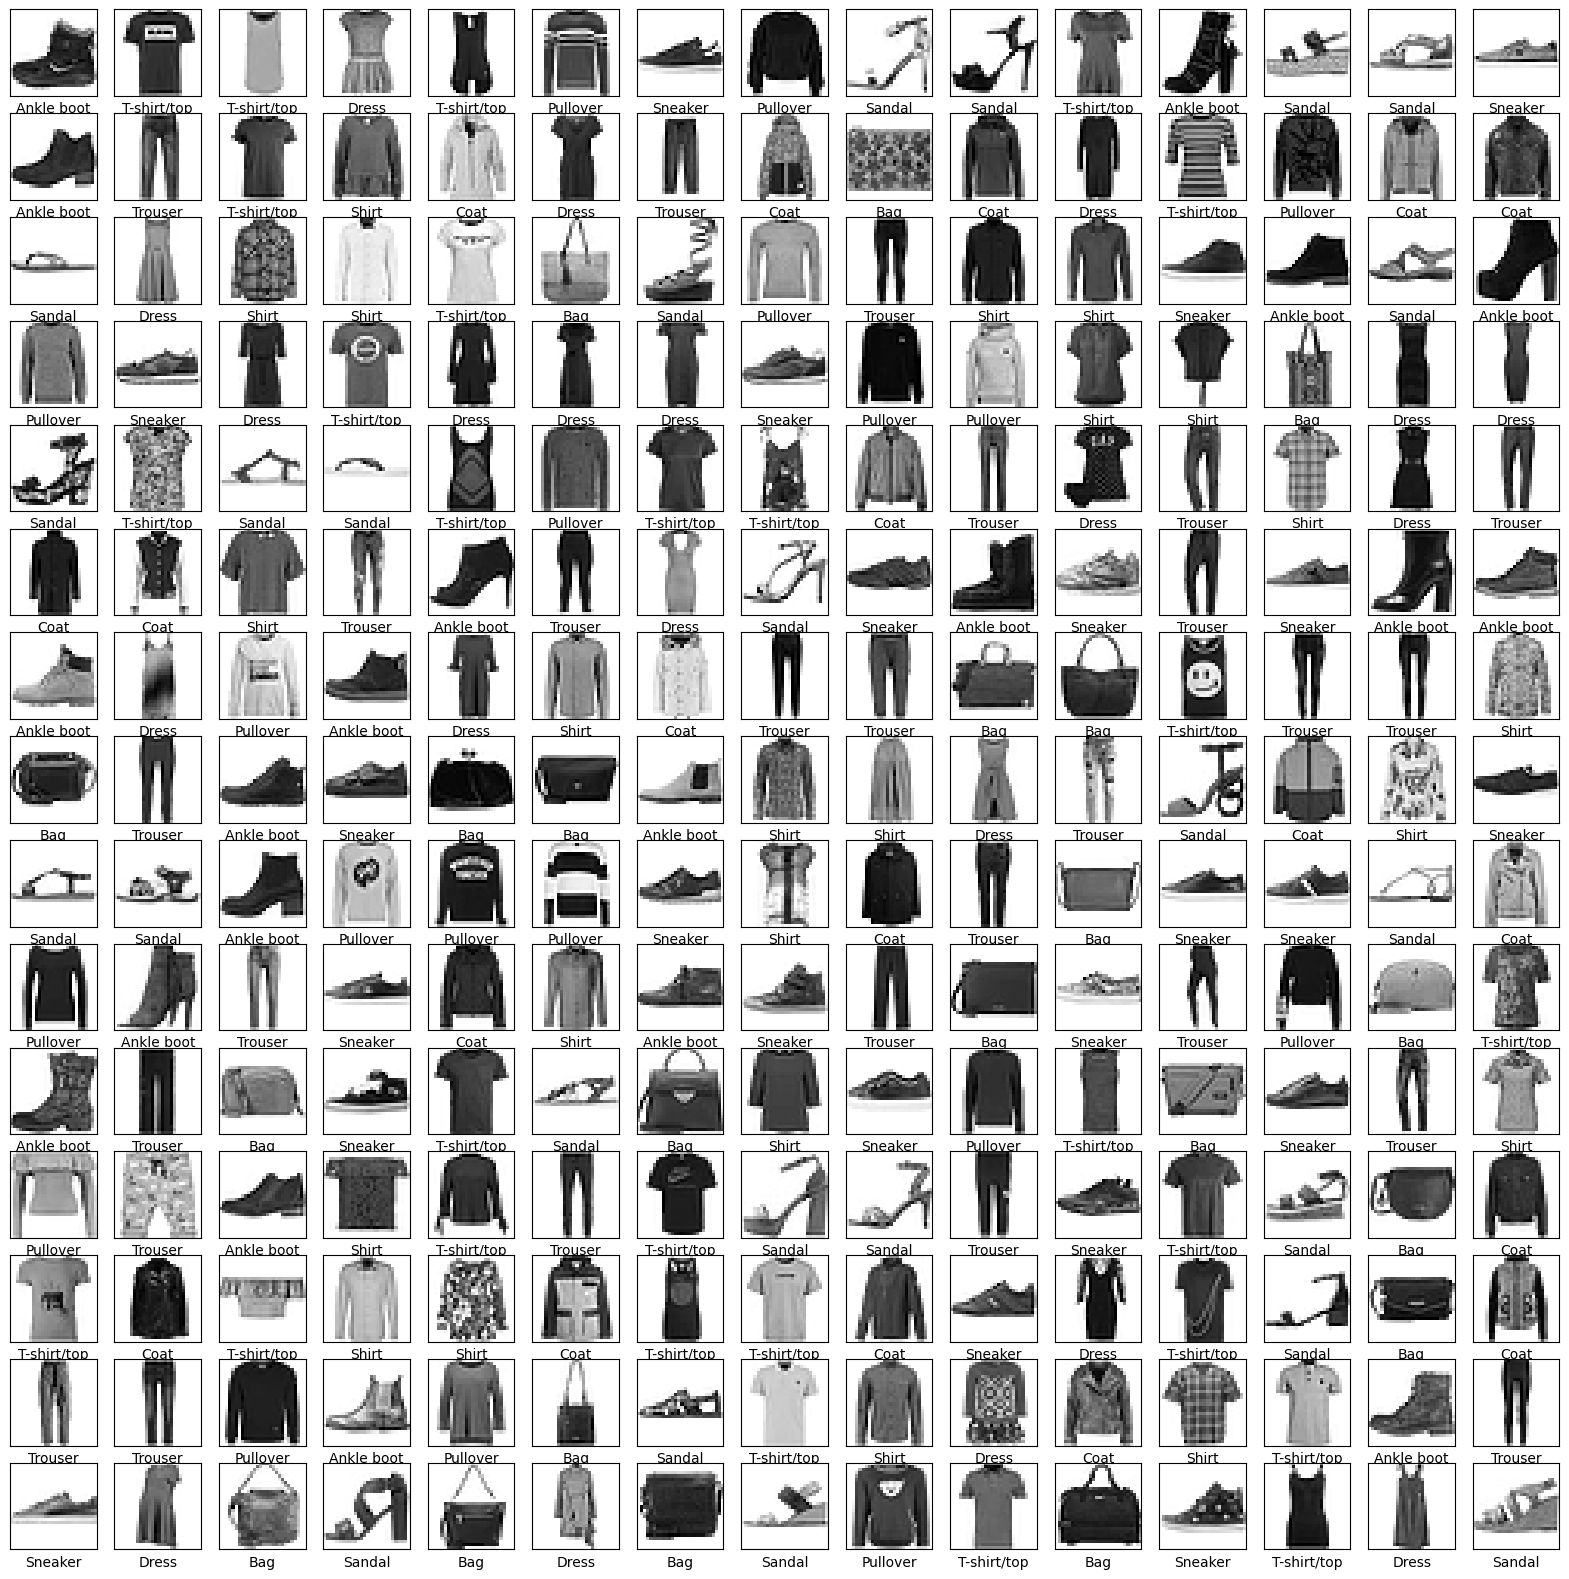

In [359]:
grid_wight = 15
grid_height = 15

plt.figure(figsize=(20,20))
for i in range(grid_height*grid_wight):
    plt.subplot(grid_wight,grid_height,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

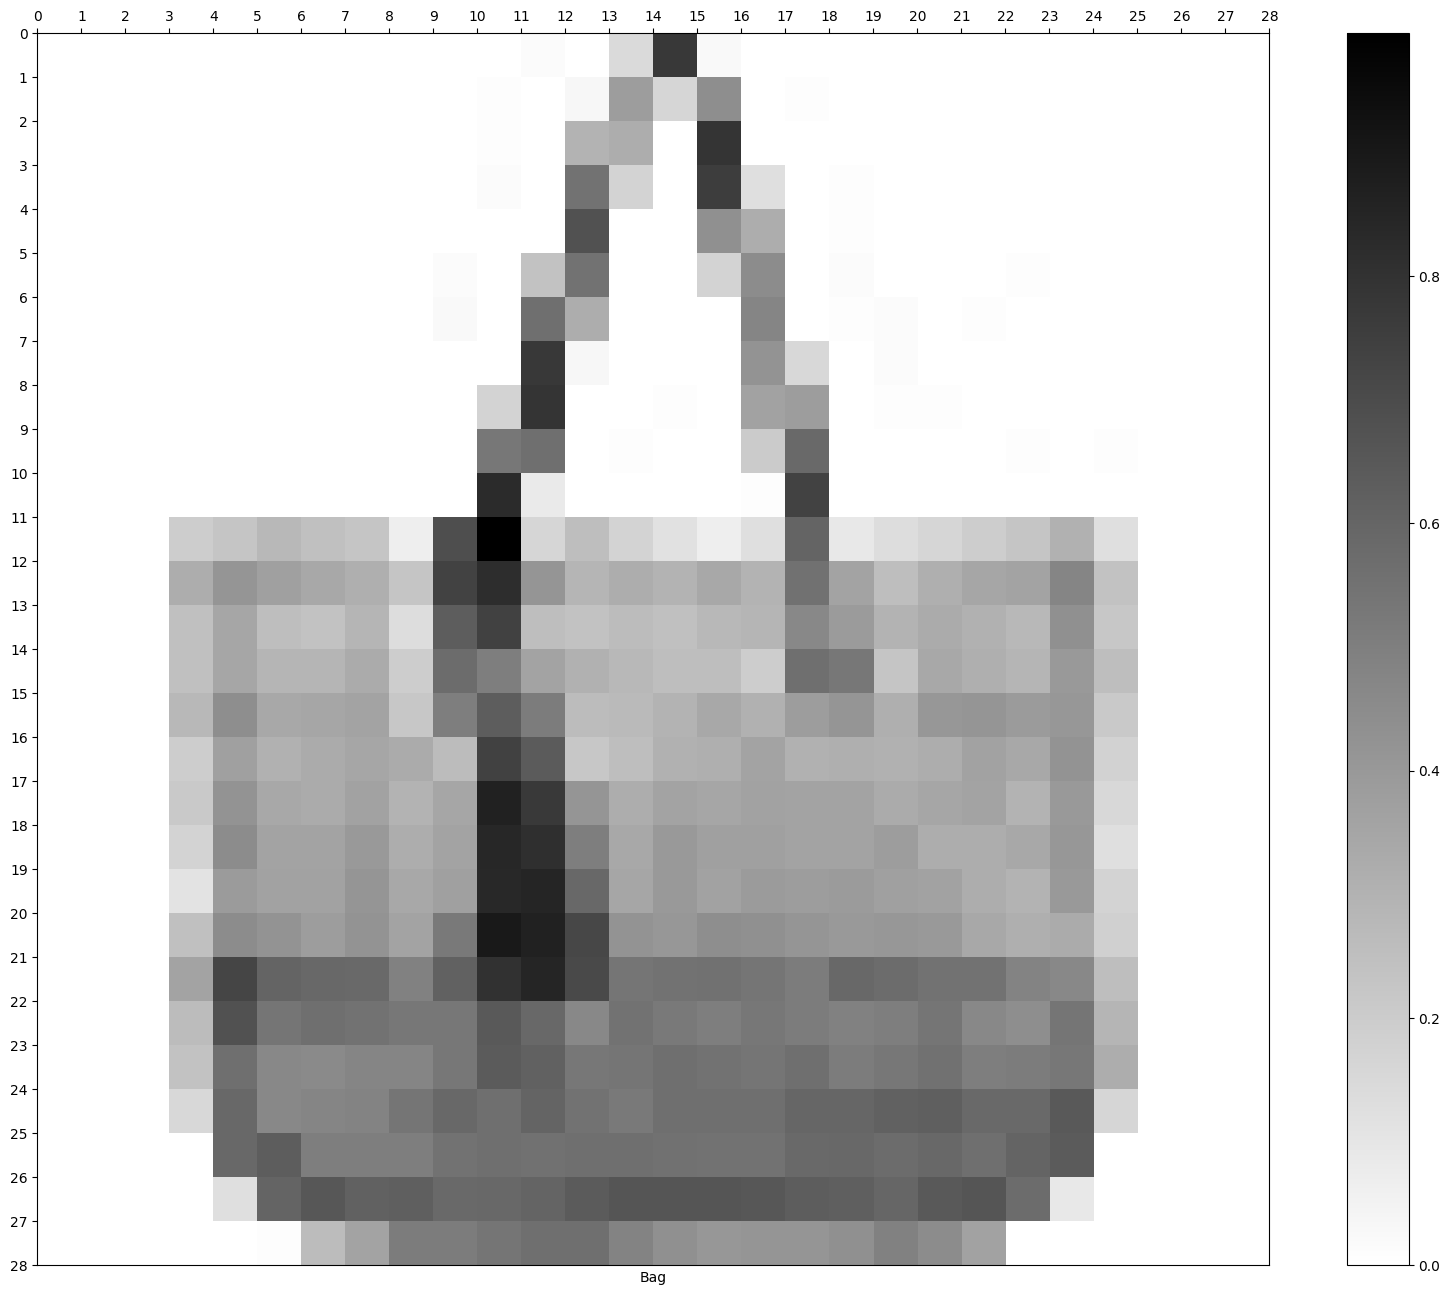

In [360]:
# Lets view the first image and classname in the dataset 
# Tip: Change "index" value to view different images.
# Inspired from: https://colab.research.google.com/github/markwest1972/CNN-Example-Google-Colaboratory/blob/master/CNN_Fashion_MNIST_Example.ipynb#scrollTo=E9KfNXIuZp0Y
index = 35
plt.figure(figsize=(20,16))
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[index]])
plt.colorbar()
#plt.grid(True)
#plt.rc('grid', linestyle="-", color='fuchsia')

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 28, 1))
ax.set_yticks(np.arange(-.5, 28, 1))
ax.set_xticklabels(np.arange(0, 29, 1))
ax.set_yticklabels(np.arange(0, 29, 1))
ax.xaxis.tick_top()

# Adds Pixel Values on top of image
#for i in range(28):
#    for j in range(28):
#        text = ax.text(j, i, round(x_train[index][i, j], 2),
#                       ha="center", va="center", color="fuchsia")
        
        
plt.show()

## CNN

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6686 - loss: 0.9104 - val_accuracy: 0.8443 - val_loss: 0.4195
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8412 - loss: 0.4427 - val_accuracy: 0.8681 - val_loss: 0.3551
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8622 - loss: 0.3796 - val_accuracy: 0.8832 - val_loss: 0.3227
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8767 - loss: 0.3421 - val_accuracy: 0.8832 - val_loss: 0.3114
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8871 - loss: 0.3116 - val_accuracy: 0.8931 - val_loss: 0.2882
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8908 - loss: 0.2988 - val_accuracy: 0.9006 - val_loss: 0.2738
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9001 - loss: 0.2772 - val_accuracy: 0.9036 - val_loss: 0.2670
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9034 - loss: 0.2591 - val_accuracy: 0.907

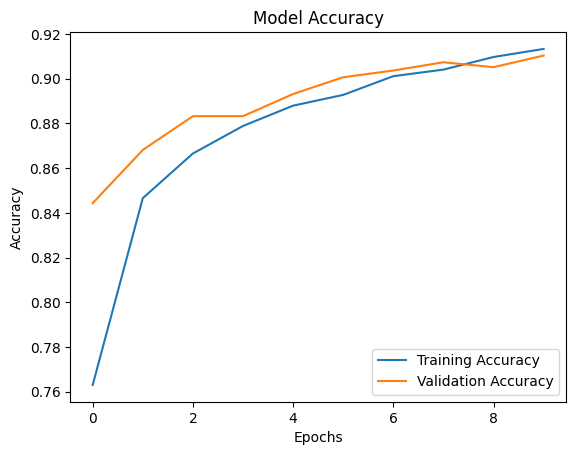

In [361]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# One-hot encode the labels. This line converts your 1D labels (y_train and y_test) to 2D one-hot encoded arrays
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Visualize random images
y_train_labels = np.argmax(y_train, axis=1)


# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# Plot training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


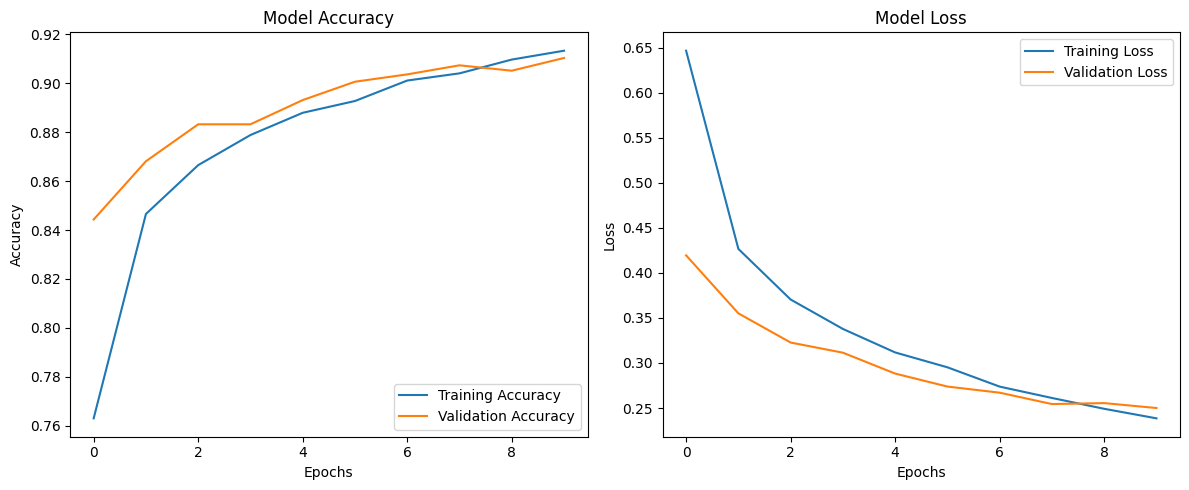

In [362]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9067 - loss: 0.2596
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


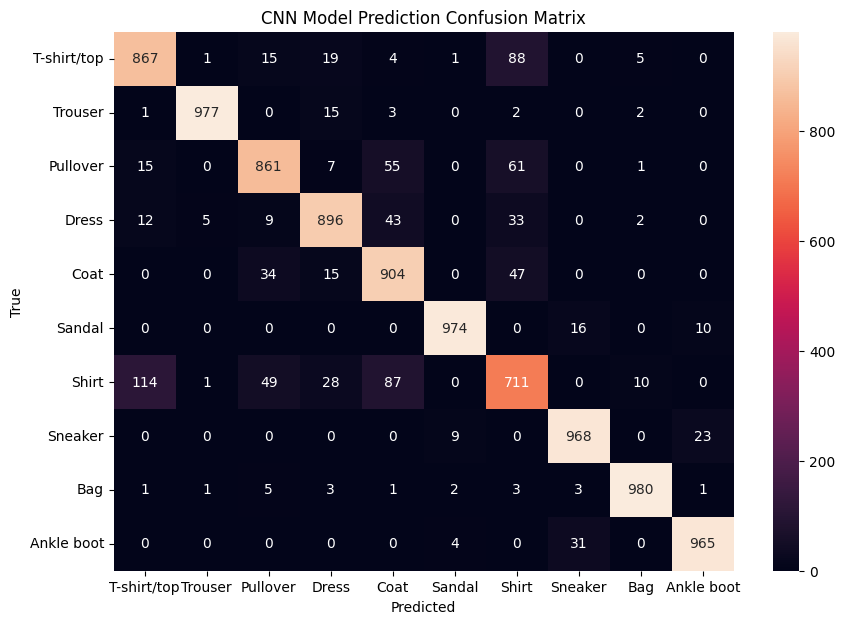

In [371]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model.evaluate(X_test, y_test)

# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot true labels to class indices

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("CNN Model Prediction Confusion Matrix")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9067 - loss: 0.2596
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 2000x2000 with 0 Axes>

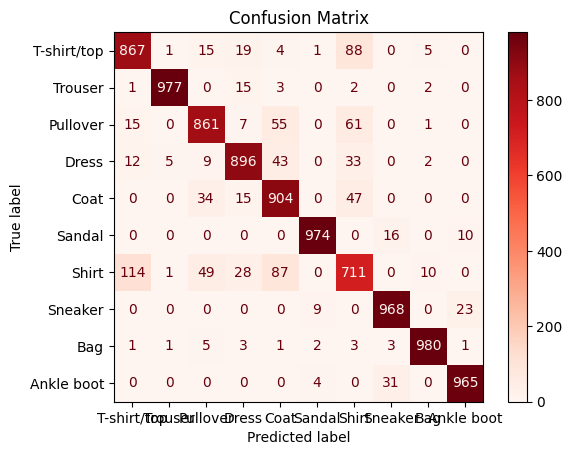

In [365]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.evaluate(X_test, y_test)

# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot true labels to class indices

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(20, 20))
disp.plot(cmap=plt.cm.Reds, values_format='d')
plt.title("Confusion Matrix")
plt.show()
